# EDSA Movie Recommendation Challenge
Team JS6 EDSA - Climate Change Belief Analysis 2021

###### Members
1. Rikus
2. Thobekani
3. Carol
4. Hlayisani

In [ ]:
# We will be using Comet as a form of version control throughout the development of our model
from comet_ml import Experiment

In [ ]:
# Create an experiment with your api key
experiment = Experiment(
    api_key="KQ1UTh7hBvPLWlz3034oIgusG",
    project_name="edsa-movie-recommendation-challenge",
    workspace="thobekanimasondo84-gmail-com",)

### Introduction

In today’s technology driven world, recommender systems are socially and economically critical for ensuring that individuals can make appropriate choices surrounding the content they engage with on a daily basis. One application where this is especially true surrounds movie content recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

With this context, we as EDSA students have constructucted a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being exposed to content they would like to view or purchase - generating revenue and platform affinity.

The evaluation metric for this model is Root Mean Square Error. Root Mean Square Error (RMSE) is commonly used in regression analysis and forecasting, and measures the standard deviation of the residuals arising between predicted and actual observed values for a modelling process. For our task of generating user movie ratings via recommendation algorithms.
<div align="center" style="width: 500px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://manofmany.com/wp-content/uploads/2020/04/Veboli-new-2.jpg"
     alt="Dummy image 1"
     style="float: center; padding-bottom=0.5em"
     width=500px/>

## Problem statement

To construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences.

$$RMSE = \sqrt{\frac{1}{|\hat{R}|} \sum_{\hat{r}_{ui}\in \hat{R}}{(r_{ui}-\hat{r}_{ui})^2}}$$

Where $$\hat{R}$$ is the total number of recommendations generated for users and movies, with rui and $$\hat{rui}$$ being the true and predicted ratings for user u watching movie i respectively.

### Python Libraries
Load the libraries we are going to use throughout our notebook. After which we will load our data collected from Kaggle.

***This notebook was designed with the following libraries. Should you not have them already installed, simply run !pip install and obtain the desired library.***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import surprise
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import train_test_split
import time
from surprise import SVD
from surprise import accuracy
import re
import plotly.express as px
import scipy as sp
from wordcloud import WordCloud, STOPWORDS
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline  import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, Normalizer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

# Packages for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from time import time

# Package to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Packages for saving models
import pickle

### Data Description
This dataset consists of several million 5-star ratings obtained from users of the online MovieLens movie recommendation service. The MovieLens dataset has long been used by industry and academic researchers to improve the performance of explicitly-based recommender systems.

**Source:**

The data for the MovieLens dataset is maintained by the GroupLens research group in the Department of Computer Science and Engineering at the University of Minnesota. Additional movie content data was legally scraped from IMDB.

**Supplied Files:**
* genome_scores.csv - a score mapping the strength between movies and tag-related properties. Read more here
* genome_tags.csv - user assigned tags for genome-related scores
* imdb_data.csv - Additional movie metadata scraped from IMDB using the links.csv file.
* links.csv - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
* sample_submission.csv - Sample of the submission format for the hackathon.
* tags.csv - User assigned for the movies within the dataset.
* test.csv - The test split of the dataset. Contains user and movie IDs with no rating data.
* train.csv - The training split of the dataset. Contains user and movie IDs with associated rating data.

**Additional Information:**

The below information is provided directly from the MovieLens dataset description files:

* All ratings are contained in the file train.csv. Each line of this file after the header row represents one rating of one movie by one user, and has the following format:
userId,movieId,rating,timestamp
The lines within this file are ordered first by userId, then, within user, by movieId.

* Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).

* Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

* All tags are contained in the file tags.csv. Each line of this file after the header row represents one tag applied to one movie by one user, and has the following format:
userId,movieId,tag,timestamp
The lines within this file are ordered first by userId, then, within user, by movieId.
Tags are user-generated metadata about movies. Each tag is typically a single word or short phrase. The meaning, value, and purpose of a particular tag is determined by each user.

* Movie information is contained in the file movies.csv. Each line of this file after the header row represents one movie, and has the following format:
movieId,title,genres
Movie titles are entered manually or imported from https://www.themoviedb.org/, and include the year of release in parentheses. Errors and inconsistencies may exist in these titles.

* Genres are a pipe-separated list, and are selected from the following:
Action
Adventure
Animation
Children's
Comedy
Crime
Documentary
Drama
Fantasy
Film-Noir
Horror
Musical
Mystery
Romance
Sci-Fi
Thriller
War
Western
(no genres listed)
Links Data File Structure (links.csv)
Identifiers that can be used to link to other sources of movie data are contained in the file links.csv. Each line of this file after the header row represents one movie, and has the following format:

* movieId is an identifier for movies used by https://movielens.org. E.g., the movie Toy Story has the link https://movielens.org/movies/1.

* imdbId is an identifier for movies used by http://www.imdb.com. E.g., the movie Toy Story has the link http://www.imdb.com/title/tt0114709/.

* tmdbId is an identifier for movies used by https://www.themoviedb.org. E.g., the movie Toy Story has the link https://www.themoviedb.org/movie/862.

* As described in this article, the tag genome encodes how strongly movies exhibit particular properties represented by tags (atmospheric, thought-provoking, realistic, etc.). The tag genome was computed using a machine learning algorithm on user-contributed content including tags, ratings, and textual reviews.

* The genome is split into two files. The file genome-scores.csv contains movie-tag relevance data in the following format:

* The second file, genome-tags.csv, provides the tag descriptions for the tag IDs in the genome file, in the following format:
tagId,tag

### Load Data Set

In [ ]:
# import dataset
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
tags_df = pd.read_csv('tags.csv')
movies_df = pd.read_csv('movies.csv')
links_df = pd.read_csv('links.csv')
imdb_df = pd.read_csv('imdb_data.csv')
genome_tags = pd.read_csv('genome_tags.csv')
genome_score = pd.read_csv('genome_scores.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [ ]:
train_df.head()

In [ ]:
test_df.head()

In [ ]:
tags_df.head()

In [ ]:
movies_df.head()

In [ ]:
links_df.head()

In [ ]:
imdb_df.head()

In [ ]:
genome_tags.head()

In [ ]:
genome_score.head()

In [ ]:
sample_submission.head()

### EDA

Exploratory Data Analysis (EDA) is a fundamental part of the Machine Learning process. The data is analysed in order to extract information that a model may overlook. In this section, we will summarise the main characteritics of the data and also look into the sentiment classes provided in our training datasets.

In [ ]:
# Find the number of times a user has rated, create a data frame with the count by userId
train_user = pd.DataFrame(
    train_df['userId'].value_counts()).reset_index()
train_user.rename(columns={'index':'userId','userId':'count'},
                  inplace=True)
train_user.head()

In [ ]:
# Grouping the users within a certain range aides in determining the common userId's and the new ones.
group_one = train_user.loc[(train_user['count'] > 0) & 
            (train_user['count'] < 50),
            'userId'].value_counts().sum()
group_two = train_user.loc[(train_user['count'] >= 50) & 
            (train_user['count'] < 500),
            'userId'].value_counts().sum()
group_three = train_user.loc[(train_user['count'] >= 500) & 
            (train_user['count'] < 1000),
            'userId'].value_counts().sum()
group_four = train_user.loc[(train_user['count'] >= 1000) & 
            (train_user['count'] < 1500),
            'userId'].value_counts().sum()
group_five = train_user.loc[(train_user['count'] >= 1500),
            'userId'].value_counts().sum()

In [ ]:
# To give us insight in the spread, we used figures to determine the spread.
trial_error = np.array([['group_one', group_one,
                         'ratings_count between 1 and 50'],
                        ['group_two', group_two,
                         'ratings_count between 50 and 500'],
                        ['group_three', group_three,
                         'ratings_count between 500 and 1000'],
                        ['group_four', group_four,
                         'ratings_count between 1000 and 1500'],
                        ['group_five', group_five,
                         'ratings_count greater than 1500']])
trial_error_df = pd.DataFrame({'group': trial_error[:, 0],
                               'userId_grouping': trial_error[:, 1],
                               'explanation': trial_error[:, 2]})
fig = px.bar(trial_error_df,
             x=trial_error_df["group"],
             y=trial_error_df["userId_grouping"],
             color=trial_error_df["group"],
             title='Grouped Rating Distribustion')
fig.show()
trial_error_df

As seen above majority of the ratings have been done by relatively new users or users who have inconsistent rating mannerisms. Based on this information we had to look for alternative ways of obtaining similarities between users by looking into the ratings per movie

In [ ]:
# Find the number of times a specific rating has been assigned, created a data frame with the count by rating.
train_rating = pd.DataFrame(
    train_df['rating'].value_counts()).reset_index()
train_rating.rename(
    columns={'index': 'rating', 'rating': 'count'}, inplace=True)
train_rating.head(10)

In [ ]:
# Understanding the distribution of ratings is key to finding common traits between users.
fig = px.bar(train_rating, x=train_rating['rating'],
             y=train_rating['count'],
             color=train_rating['rating'],
             title='Distribustion by Rating')
fig.show()

As seen from the above distribution by rating figure, rating 4 has a count of 2.652977M. Which clearly indicates to us that the users in the dataset will opt for giving movies a rating of 4.

In [ ]:
# Create a Data Frame outlining the size of our data
dataframes = ['train_df', 'test_df', 'tags_df', 'imdb_df',
              'links_df', 'movies_df', 'genome_tags', 'genome_score']
sizes = [len(train_df), len(test_df), len(tags_df),
         len(imdb_df), len(links_df), len(movies_df),
         len(genome_tags), len(genome_score)]
total_size_df = pd.DataFrame(list(zip(dataframes, sizes)),
                             columns=['dataframe', 'sizes'])
total_size_df

In [ ]:
print(total_size_df[total_size_df['sizes'] < 70000].sum())

In [ ]:
new_row = {'dataframe': 'other', 'sizes': 180530}
total_size_df = total_size_df.append(new_row,
                                     ignore_index=True)
total_size_df

In [ ]:
# By refining the data frame we were able to see the distribution of the overall data.
total_size_df = total_size_df[total_size_df['sizes'] > 100000]
total_size_df

In [ ]:
explodeTuple = (0.0, 0.0, 0.0, 0.0, 0.4)
fig1, ax1 = plt.subplots()
ax1.pie(total_size_df['sizes'].values,
        labels=total_size_df['dataframe'].values,
        explode=explodeTuple,
        startangle=90, autopct='%1.1f%%')
ax1.axis('equal')
plt.title('Distribution of overall Data Frames')
plt.show()

In [ ]:
len_list = [['train_df', len(train_df)], ['tags_df', len(tags_df)],
            ['imdb_df', len(imdb_df)], ['links_df', len(links_df)],
            ['movies_df', len(movies_df)],
            ['genome_tags', len(genome_tags)],
            ['genome_score', len(genome_score)]]
len_df = pd.DataFrame(len_list,
                      columns=['Dataset', 'Size'])
fig = px.bar(len_df, x=len_df['Dataset'],
             y=len_df['Size'],
             color=len_df['Dataset'],
             title='Distribution of overall Data Frames')
fig.show()

Missing values, mainly known as null values, occur due to multiple reasons including errors whilst collecting data. These values are either removed because they add no value to the output of the models or ignored depending on the amount of null values contained within a data frame; all data has to be valid and valued. Duplicates are also removed as they do not provide any new information. The reduced number of values also result in less model run time.

In [ ]:
# Obtaining total null values in each Data Frames columns
train_count = pd.DataFrame(train_df.isnull().sum())
test_count = pd.DataFrame(test_df.isnull().sum())
tags_count = pd.DataFrame(tags_df.isnull().sum())
movies_count = pd.DataFrame(movies_df.isnull().sum())
links_count = pd.DataFrame(links_df.isnull().sum())
imdb_count = pd.DataFrame(imdb_df.isnull().sum())
genomet_count = pd.DataFrame(genome_tags.isnull().sum())
genomes_count = pd.DataFrame(genome_score.isnull().sum())

In [ ]:
train_count

In [ ]:
test_count

In [ ]:
tags_count

In [ ]:
plt.bar(tags_count.index,
        tags_count.values.reshape(len(tags_count), ),
        color='purple')
plt.xlabel('column_name')
plt.ylabel('count')
plt.title('Null value count in tags_df')
plt.show()
tags_df[tags_df.isnull().any(axis=1)]

In [ ]:
movies_count

In [ ]:
links_count

In [ ]:
plt.bar(links_count.index,
        links_count.values.reshape(len(links_count), ),
        color='orange')
plt.xlabel('column_name')
plt.ylabel('count')
plt.title('Null value count in links_df')
plt.show()

In [ ]:
imdb_count

In [ ]:
plt.bar(imdb_count.index,
        imdb_count.values.reshape(len(imdb_count), ),
        color='red')
plt.xlabel('column_name')
plt.ylabel('count')
plt.title('Null value count in imdb_df')
plt.show()

In [ ]:
genomet_count

In [ ]:
genomes_count

Based on the above resluts, majority of the data frames had no null values present. Removing the null values could grant a more refined data depending on the amount of null values present. The imdb_df had a large amount of null values and dropping these rows would have resulted in a smaller data set which inturn could play a role in the long run.

### Visualising Common Attributes/Correlation For Each Dataframe

In statistics, correlation or dependence is any statistical relationship, whether causal or not, between two random variables or bivariate data. In the broadest sense correlation is any statistical association, though it commonly refers to the degree to which a pair of variables are linearly related. The correlation coefficient is measured on a scale that varies from + 1 through 0 to - 1. Complete correlation between two variables is expressed by either + 1 or -1. When one variable increases as the other increases the correlation is positive; when one decreases as the other increases it is negative. Complete absence of correlation is represented by 0.

In [ ]:
# Correlation between the train_df and tags_df
corr1 = pd.concat([train_df, tags_df], axis=1).corr()
corr1.head()

In [ ]:
ax = sns.heatmap(corr1, vmin=0,vmax=5,center=1,cmap="RdBu_r")

In [ ]:
# Finding values in the UserID columns of the tags and train data frame.
common_at = pd.DataFrame(train_df['userId'].isin(tags_df['userId']).
                         value_counts())
plt.bar(['Not Present', 'Present'],
        common_at.values.reshape(len(common_at), ),
        color='green')
plt.xlabel('Values present/absent in both Data Frames')
plt.ylabel('count_in_millions')
plt.title('common_attributes between the train and tags data frames')
plt.show()

Not many rows have common attributes we can use to link the train_df dataframe with the tags_df dataframe. Knowing the user and the type of genre they prefer to view, we can make a calculated estimate based on their watch history. Finding a link between the tables can increase the amount of variables used to predict the rating based on the user preferences.

In [ ]:
# Finding values in the MovieID columns of the tags and train data frame.
common_at2 = pd.DataFrame(train_df['movieId'].isin(tags_df['movieId']).
                          value_counts())
plt.bar(['Not Present', 'Present'],
        common_at2.values.reshape(len(common_at2), ),
        color='green')
plt.xlabel('Values present/absent in both Data Frames ')
plt.ylabel('count_in_millions')
plt.title('common_attributes between the train and tags data frames')
plt.show()

In [ ]:
# Finding values in the Timestamp columns of the tags and train data frame.
common_at = pd.DataFrame(train_df['timestamp'].isin(tags_df['timestamp']).
                         value_counts())
plt.bar(['Not Present', 'Present'],
        common_at.values.reshape(len(common_at), ),
        color='orange')
plt.xlabel('Values present/absent in both Data Frames')
plt.ylabel('count_in_millions')
plt.title('common_attributes between the train and tags data frames')
plt.show()

In [ ]:
# Finding values in the MovieID columns of the links and movies data frame.
common_at1 = pd.DataFrame(movies_df['movieId'].isin(links_df['movieId']).
                          value_counts())
plt.bar(['Present'],
        common_at1.values.reshape(len(common_at1), ),
        color='red')
plt.xlabel('Values present/absent in both Data Frames')
plt.ylabel('count')
plt.title('common_attributes between the movies and links data frame')
plt.show()

Checked for common attributes between different data frames. These attributes assist us in extending our understanding of the similarities between ratings based on: Movie Genres, Directors, Movie Budgets, Movie Titles, etc.

Based on the information provided, we able to deduce the following: 

1. Although the train_df and the tags_df have similiar users ID's, majority of the users are new or inconsistent raters.
2. The common attributes are minimal between the train_df and tags_df.
3. Although there are a few users with similiar ID's, these users have no common attributes interms of the movies watched or the length of the movies.
4. The table with the most common links are the movie_df and the links_df which have common attributes in the movie ID's column.

In [ ]:
# Merged the train and movies data frame to increase the data utilized.
movie_data = pd.merge(train_df, movies_df, on='movieId')
movie_data.head()

In [ ]:
# The average rating per title.
movie_data.groupby('title')['rating'].mean().head()

In [ ]:
movie_data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

In [ ]:
# The average number of times a movie has been rated.
movie_data.groupby('title')['rating'].count().sort_values(ascending=False).head()

In [ ]:
ratings_mean_count = pd.DataFrame(movie_data.groupby('movieId')['rating'].
                                  mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(movie_data.
                                                   groupby('movieId')
                                                   ['rating'].count())
ratings_mean_count.head()

In [ ]:
plt.figure(figsize=(8, 6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='rating', y='rating_counts',
              data=ratings_mean_count,
              alpha=0.4)
plt.show()

The average rating is based on the titles of the movies. For instance, Selling Isobel (2018) received an averaging of 5 stars, these averages could be misleading. Users could have rated the movies once and this could have increased the average rating. Shawshank Redemption, The (1994) had a total of 32831 ratings but due to the imabalance between user and ratings, the average ratings dropped. The inconsistency in the data could essentially lead to a biased model due to these observations. Grouping the ratings by the genre and finding the links between title of the movie and the average rating aided us in determining the variables which play a role in predicting the rating.

### Word Cloud

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing data from social network websites.

In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in tags_df['tag']:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width=800, height=800,
                      background_color='black',
                      stopwords=stopwords,
                      min_font_size=10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Distribution of words in the tags data frame by Tags')
plt.tight_layout(pad=0)

plt.show()

In [ ]:
value_count = pd.DataFrame(tags_df['tag'].
                           value_counts()).reset_index()
value_count.rename(columns = {'index': 'genre', 'tag': 'count'},
                   inplace = True)
value_count.head()

Distribution of genres and the amount of ratings that a certain genre assisted in finding similarities between viewers and their ratings. With majority of the ratings revolving around 'sci-fi' movies and minority around 'voice overs'. Seeing the inconsistency incertain genre's we decided to obtain movie genres that have a total number of ratings count over 2500 to ensure we have consistency in our data.

In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in genome_tags['tag']:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width=800, height=800,
                      background_color='black',
                      stopwords=stopwords,
                      min_font_size=10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Common words within the genome_tags, tags column')
plt.tight_layout(pad=0)

plt.show()

We are able to deduce the importance of certain words that could play a role in the functionality of our algorithem. The most used words in the genome_tags were:
1. good
2. war
3. oscar best
4. based on a true story
5. comedy

Viewers base their choices on a plethora of information ranginng from movie title, length, budget, actors present etc. Using this information, obtaining predictions that have a low RMSE score would be easier.

In [ ]:
train_com_user = train_df.groupby('userId')
train_com_user.get_group(1)

In [ ]:
train_com_user.head()

### Release Year

We will explore the release year of the movies.

In [ ]:
dates = []
for title in movies_df['title']:
    if title[-1] == " ":
        year = title[-6: -2]
        try:
            dates.append(int(year))
        except:
            dates.append(9999)
    else:
        year = title[-5: -1]
        try:
            dates.append(int(year))
        except:
            dates.append(9999)

movies_df['release year'] = dates
movies_df['release year'].unique()

In [ ]:
len(movies_df)

In [ ]:
movies_df[movies_df['release year'] == 9999].head()

In [ ]:
movies_df[(movies_df['release year'] > 1888) &
          (movies_df['release year'] < 2021)]

In [ ]:
dataset = pd.DataFrame(movies_df['release year'].
                       value_counts()).reset_index()
dataset.rename(columns={'index': 'year', 'release year': 'count'},
               inplace=True)
dataset.head(50)

In [ ]:
# Plotting the release years
fig = px.bar(dataset, x=dataset['year'],
             y=dataset['count'],
             color=dataset['year'],
             title='Movies released per release year')
fig.show()

The earliest release year of a movie in our dataset goes as far back to 1874.

### Exploring Movie Genre

In [ ]:
genres = pd.DataFrame(movies_df['genres'].
                      str.split("|").
                      tolist(),
                      index=movies_df['movieId']).stack()
genres = genres.reset_index([0, 'movieId'])
genres.columns = ['movieId', 'Genre']
genres.head()

In [ ]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.countplot(x='Genre',
              data=genres,
              palette='CMRmap',
              order=genres['Genre'].
              value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Genre', size=20)
plt.ylabel('Count', size=20)
plt.title('Distribution of Movie Genres', size=25)
plt.show()

According to a study published by Amy Waston (Favorite film genres in the U.S. 2018, by gender) that can be found on https://www.statista.com/statistics/254115/favorite-movie-genres-in-the-us/ suggests that the top two genres liked by both men and women are Comedys and Dramas. From above results we can see that Drama and Comedy are the movie genre that the viewers would most likely would watch.

### Exploring Movie Budget

In [ ]:
new_l = list(imdb_df['budget'])
print(type(new_l[9]))

In [ ]:
imdb_df['runtime'] = imdb_df['runtime'].fillna(imdb_df['runtime'].mean())
imdb_df.isnull().sum()

In [ ]:
imdb_df.head()

In [ ]:
imdb_df['budget'] = imdb_df['budget'].str.replace('[\,]', '', regex=True)

In [ ]:
def clean_txt(text):
    text = re.sub(r'[0-9]+', "", str(text))
    return text

imdb_df['currency'] = imdb_df['budget'].apply(clean_txt)
imdb_df.head()

In [ ]:
currencies = list(imdb_df['currency'])
# Number of currencies
len(set(currencies))-1

In [ ]:
currencies_count_df = pd.DataFrame(imdb_df['currency'].
                                   value_counts()).reset_index()
currencies_count_df.rename(columns={'index': 'currency', 'currency': 'count'},
                           inplace=True)
currencies_count_df.head()

In [ ]:
fig = px.bar(currencies_count_df, x=currencies_count_df['currency'],
             y=currencies_count_df['count'],
             color=currencies_count_df['currency'],
             title='Currency Type Distribution')
fig.show()

More than 71% of the data in the budget column are null values. The budget column contains different currencies with the US Dollar holding the majority. The exchange rates change gradually over time, with time value of money, money loses value over time so comparing or changing to one currency will not be ideal.

### Models

For each model in this section, we will prepare the data and train the model. The reason for this is that each model requires different type of preprocessing.

### Collaborative Filtering (Singular Value Decomposition)

The collaborative filtering approach builds models based on user’s past behaviors as well as similar decisions made by other users. This model is used to predict items (or ratings for items) that the user may have an interest in. 
Within collaborative filtering, there are two well-known distinct approaches:

1. Memory-Based: models calculate the similarities between users / items based on user-item rating pairs.
2. Model-Based: models use some sort of machine learning algorithm to estimate the ratings.

For this model, we will be using the model-based approach, in particular, the singular value decomposition (SVD).

In the SVD model, an estimated rating of user u on item i is calculated as:
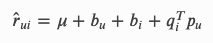
* where μ is the overall average rating, and every other parameter is calculated from the model with a gradient descent method. 
* The model will then try to fit this estimated rating on all the known ratings, minimise the MSE (mean squared error), and return the closest fit. 
* bᵤ and bᵢ are scalars, they represent the biases of the user u or item i. 
* pᵤ and qᵢ are vectors,.they are the actual matrix-factorisation part of the model.

### Data Preparation

In [ ]:
data = train_df.drop(['timestamp'], axis=1)
data = data.reset_index(drop=True)

print(data.shape)
data.head()

In [ ]:
reader = Reader(rating_scale=(0.0, 5.0))
df = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)
df

In [ ]:
trainset, testset = train_test_split(df, test_size=0.10)

### Modelling

In [ ]:
# modelstart = time.time()

# Contains default parameters
algo = SVD(n_factors=100, n_epochs=20, lr_all=0.005, reg_all=0.02)
algo.fit(trainset)

predictions = algo.test(testset)
rmse_svd = accuracy.rmse(predictions)
print('RMSE: ', rmse_svd)
# print("Model Runtime: %0.2f seconds" % ((time.time() - modelstart)))

### Collaborative Filtering Using Cosine Similarity

Cosine similarity is a metric used to measure how similar the documents are irrespective of their size. Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space.

### Data Preparation

In [ ]:
# Create Data Frame based on the grouping of elements by userID
user_id_avg = train_df.groupby(by="userId", as_index=False)['rating'].mean()
rating_avg = pd.merge(train_df, user_id_avg, on='userId')
# Obtain the average rating difference by ubtracting rating minus mean rating
rating_avg['adg_rating'] = rating_avg['rating_x'] - rating_avg['rating_y']
rating_avg.head()

In [ ]:
movieID_value = pd.DataFrame(rating_avg['movieId'].
                             value_counts()).reset_index()
movieID_value.rename(columns={'index': 'movieId', 'movieId': 'count'},
                     inplace=True)
movieID_value

In [ ]:
# Merge Data frames to increase information
rating_avg = pd.merge(movieID_value, rating_avg, on='movieId')
rating_avg.head()

In [ ]:
# To preserve disk memory, only include ratings above 1000 per user.
rating_avg = rating_avg[rating_avg['count'] > 1000]
rating_avg.head()

In [ ]:
rating_avg.groupby('movieId')['adg_rating'].count().sort_values(ascending=False).head()

The distributrion of movie ID's by rating also contained movies with single ratings or ratings that could be seen as negligable. We decided to obtain the top 20 movie ID's and see how they are distributed. Based on the graphs, we noticed movie ID 318 had the most ratings and this aided in using a base movie to obtain similarities amoung users when using the cosine similarity method.

###### Modelling

In [ ]:
final = pd.pivot_table(rating_avg,
                       values='rating_x',
                       index='userId',
                       columns='movieId')

final.head()

In [ ]:
# Obtain the best rated movie.
best_ratings = final.iloc[317]
best_ratings.head()

In [ ]:
# Find the correlation of movie ratings based on the best rated movie.
movies_like_318 = final.corrwith(best_ratings)
corr_shawshank = pd.DataFrame(movies_like_318,
                              columns=['correlation'])
corr_shawshank.dropna(inplace=True)
corr_shawshank.head()

In [ ]:
corr_shawshank.sort_values('correlation', ascending=False).head(10)

In [ ]:
corr_shawshank = corr_shawshank.join(ratings_mean_count['rating_counts'])
corr_shawshank.head()

In [ ]:
corr_shawshank.reset_index()

In [ ]:
trial = pd.merge(corr_shawshank, rating_avg, on='movieId')
trial.head()

In [ ]:
attempt = pd.pivot_table(trial,
                         values='correlation',
                         index='userId',
                         columns='movieId')
attempt.head()

In [ ]:
final_user = attempt.apply(lambda row: row.fillna(row.mean()),
                           axis=1)
final_user.head()

In [ ]:
# Fill the diagonal of the new table with Zeroes.
np.fill_diagonal(final_user.values, 0)

In [ ]:
# Find a predefined number of training samples closest in
# distance to the new point.

def find_n_neighbours(df, n):

    order = np.argsort(df.values, axis=1)[:, : n]
    df = df.apply(lambda x: pd.Series(x.sort_values(ascending=False)
                  .iloc[:n].index,
                  index=['top{}'.format(i) for i in range(1, n+1)]), axis=1)
    return df

In [ ]:
# Find a users top 3 favorite movies.
sim_user_30_u = find_n_neighbours(final_user, 3)
sim_user_30_u.head()

In [ ]:
# Get users with similiar rating styles.

def get_user_similar_movies(user1, user2):
    common_movies = rating_avg[rating_avg.userId == user1].merge(
        rating_avg[rating_avg.userId == user2],
        on="movieId",
        how="inner")
    return common_movies.merge(movies_df, on='movieId')

In [ ]:
# See if our algorithm is able to find similiar movies between two users.

a = get_user_similar_movies(370, 86309)
a = a.loc[:, ['rating_x_x', 'rating_x_y', 'title']]
a.head()

In [ ]:
# Dictionary to round numbers to the nearest userID.

def dictionary_trial(item):
    my_list = [col for col in final_user.columns]
    my_dict = {'values': my_list}
    answer = []

    for x in my_dict['values']:
        if x < item:
            answer.append(x)
        if x == item:
            answer.append(item)
    return (max(answer))

In [ ]:
# Check if we are able to round of to the nearest user.
dictionary_trial(195160)

In [ ]:
# Predict the rating based on the user and the movie chosen.

def User_item_score(user, item):
    mean = train_df.groupby(by="userId", as_index=False)['rating'].mean()
    # print(1)
    a = sim_user_30_u[sim_user_30_u.index == user].values
    # print(2)
    b = a.squeeze().tolist()
    # print(3)
    c = final_user.loc[:, dictionary_trial(item)]
    # print(4)
    # print(c)
    d = c[c.index.isin(b)]
    # print(5)
    # print(d)
    f = d[d.notnull()]
    # print(6)
    # print(f)
    avg_user = mean.loc[mean['userId'] == user, 'rating'].values[0]
    # print(7)
    # print(avg_user)
    index = f.index.values.squeeze().tolist()
    # print(8)
    # print(index)
    corr = final_user.loc[user, index]
    # print(9)
    fin = pd.concat([f, corr], axis=1)
    # print(10)
    fin.columns = ['adg_score', 'correlation']
    # print(11)
    fin['score'] = fin.apply(lambda x: x['adg_score'] * x['correlation'], axis=1)
    # print(12)
    nume = fin['score'].sum()
    # print(13)
    deno = fin['correlation'].sum()
    # print(14)
    final_score = avg_user + (nume / deno)
    # print(15)
    return final_score

# score = User_item_score(129299, 129299)

In [ ]:
# Check if we are able to predict based on similiar user ratings.
score = User_item_score(129298, 129298)
print("score (u,i) is", score)

In [ ]:
sliced_df = train_df.iloc[0: 100, :]
tester_df = sliced_df[['userId', 'movieId', 'rating']]
tester_df['pred_rating'] = [User_item_score(tester_df['userId'][i],
                                            tester_df['movieId'][i]) for i in list(tester_df.index)]

In [ ]:
tester_df['movieId'][129299]

In [ ]:
# Obtain the RMSE for the sample provided.
rmse = mean_squared_error(tester_df['rating'].values,
                          tester_df['pred_rating'].values,
                          squared=False)
print("RMSE: ", rmse)

###### Content-Based Filtering (Linear Regression)

Content-Based recommenders treat recommendation as a user-specific classification problem and learn a classifier for the user's likes and dislikes based on an item's features. In this system, keywords are used to describe the items and a user profile is built to indicate the type of item this user likes.We Linear Regression for this model.

Simple linear regression is a statistical method that shows the relationship between two continuous variables. This is represented by a straight line with the equation:
$$ y = a + bx$$   
where $a$ is the intercept of the line with the y-axis, and $b$ is the gradient.  
The independent variable ($x$) is also known as the predictor and the dependent variable ($y$) is known as the target.

We will merge each movie with it's genre, casts, director and plot keywords as way to find out how similar is the test movie to any movie the user has rated before, then rate the 'test movie' by the highest similarity in any rating category. This will assist us to categorise the movies each user has watched by rating.

###### Data Preparation

In [ ]:
# Dataframe we are working with.
working_train = tester_df #.drop(columns='timestamp')

In [ ]:
# Merge
df_work = working_train.set_index('movieId').join([movies_df
                                                [['movieId', 'genres']].
                                                set_index('movieId'),
                                                imdb_df[['movieId',
                                                'title_cast',
                                                'director',
                                                'plot_keywords']].
                                                set_index('movieId')],
                                                how='left').reset_index()

In [ ]:
def preprocessor(df):
    
    df_work['genres'] = ['' if x == '(no genres listed)' else x for x in df_work['genres']]

    # filling missing values with 'nothing'... (emptying...?)
    df_work.fillna('', inplace=True)

    for col in df_work.select_dtypes('object').columns: # selecting 'object' columns

        # removing white space
        df_work[col] = [''.join(x.split()) for x in df_work[col]]

        # substituting '|' with a white space
        df_work[col] = [' '.join(x.split('|')) for x in df_work[col]]

    # joining the features of interest
    df_work['corpus'] =  df_work[df_work.select_dtypes('object').columns].apply(lambda x: ' '.join(x), axis=1)
    return df_work[['movieId', 'userId', 'corpus']]

In [ ]:
Test = preprocessor(test_df)
Test

In [ ]:
X = preprocessor(train_df.drop(columns=['timestamp'])) # DO NOT RUN THIS ON LOCAL COMPUTER

In [ ]:
y = train_df['rating']

In [ ]:
X['rating'] = y

In [ ]:
X1 = X.drop(columns=['rating', 'userId', 'movieId'])
T1 = Test.drop(columns=['userId', 'movieId'])

In [ ]:
cv = CountVectorizer()
X_mat =cv.fit_transform(X1['corpus'])

In [ ]:
Test_mat = cv.transform(T1['corpus'])

In [ ]:
X_mat.shape

In [ ]:
# sample.head()

###### Modelling

In [ ]:
estimators2 = []
estimators2.append(('standardize',
                    StandardScaler(with_mean=False)))
estimators2.append(('mod',
                    LinearRegression()))
model = Pipeline(estimators2)
model.fit(X_mat, y)

###### Collaborative Filtering

In [ ]:
count_df = pd.DataFrame(train_df['movieId'].value_counts()).reset_index()
count_df.rename(columns = {'index':'movieId','movieId' : 'count'}, inplace = True)
count_df

In [ ]:
train_count =pd.merge(count_df, train_df ,on='movieId')
train_count.head()

In [ ]:
filter_user = train_count[train_count['count']>10000]

In [ ]:
filter_user.head()

In [ ]:
test_df

In [ ]:
reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(filter_user[['movieId',
                                         'userId',
                                         'rating']],
                            reader)

In [ ]:
benchmark = []
# Iterate over all algorithms
for algorithm in [NormalPredictor(),
                  KNNBaseline(),
                  KNNBasic(),
                  KNNWithMeans(),
                  KNNWithZScore(),
                  BaselineOnly(),
                  CoClustering(),
                  SVD()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'],
                             cv=3, verbose=False)

    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).
                                split(' ')[0].
                                split('.')[-1]],
                               index=['Algorithm']))
    benchmark.append(tmp)

pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')

In [ ]:
print('Using ALS')
bsl_options = {'method': 'als',
               'n_factors' : 300, 
               'lr_all':0.0085,
               'reg_all' : 0.02,
               'n_epochs':40,
               'init_std_dev':0.01
               }
algo = SVD(bsl_options=bsl_options)
cross_validate(algo, data, measures=['RMSE'],
               cv=3, verbose=False)

In [ ]:
# Training and validation set split for hypertuning

train_set = data.build_full_trainset()
# train_set, val_set = train_test_split(data, test_size=0.008, random_state=42)

# Modelling of the SVD hypertuning
algo = SVD(n_factors=300, 
                     lr_all=0.0085,
                     reg_all=0.02,
                     n_epochs=40,
                     init_std_dev=0.01)
algo.fit(train_set)

# Predicting on the validation set
# svd_hyper_predictions = algo.test(val_set)

# Dictionary for the data to log for the SVD tuned model
params = {'model_name': 'SVD_Tuned'}
# metrics = {'RMSE': accuracy.rmse(svd_hyper_predictions)}


In [ ]:
submission_df = [algo.predict(row.userId, row.movieId) for _,row in test_df.iterrows()]

In [ ]:
df_pred = pd.DataFrame(submission_df)

In [ ]:
df_pred=df_pred.rename(columns={'uid':'userId', 'iid':'movieId','est':'rating'})

In [ ]:
df_pred.drop(['r_ui','details'],axis=1,inplace=True)

In [ ]:
df_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)
df_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)

In [ ]:
# Drop the features that will not be required for the submission
df_pred.drop(['userId', 'movieId'], inplace=True, axis= 1)
#Change positioning of columns
df_pred = df_pred[['Id', 'rating']]
# Create Submission file
df_pred.to_csv("JS6_submission_full_trainset.csv", index=False)
df_pred

In [ ]:
df_pred.to_csv("JS6_submission_full_trainset_new_params.csv", index=False)

In [ ]:
# # Compare RMSE squared values between models
# fig, caxis = plt.subplots(figsize=(12, 6))
# rmse_x = ['Linear Regression',
#           'BaselineOnly', 'SVD',
#           'Cosine Similarity',
#           'Baseline Only',
#           'KNN Baseline',
#           'KNN With Means',
#           'KNN WIth Z Score',
#           'KNN Basic',
#           'CoClustering',
#           'Normal Predictor']
# rmse_y = [lr_rmse, baseline_rmse, rmse_svd, CF_cosine, baselineOnly,
#           kNNBaseline, kNNWithMeans, kNNWithZScore, kNNBasic,
#           coClustering, normal]
# ax = sns.barplot(x=rmse_x, y=rmse_y, palette='plasma_r')
# plt.title('RMSE Values of Models', fontsize=14)
# plt.ylabel('RMSE')
# plt.xticks(rotation=90)
# for p in ax.patches:
#     ax.text(p.get_x() + p.get_width()/2, p.get_y() + p.get_height(),
#             round(p.get_height(), 2),
#             fontsize=12, ha="center",
#             va='bottom')
# plt.show()

In [ ]:
svd_params = dict(n_factors=100, n_epochs=20,
                  lr_all=0.005, reg_all=0.02)

lr_params = dict(fit_intercept=True, normalize=False,
                 copy_X=True, n_jobs=None)

baselineOnly_params = dict(verbose =True)

knnbaseline_params = dict(k=40, min_k=1, sim_options={},
                          bsl_options={}, verbose=True) 

knnwithmeans_params = dict(k=40, min_k=1,
                           sim_options={}, verbose=True)

knnwithzscore_params = dict(k=40, min_k=1,
                            sim_options={}, verbose=True)
                            
knnbasic_params = dict(k=40, min_k=1,
                       sim_options={}, verbose=True)

In [ ]:
params = {'model type': 'SVD',
          'scaler': 'standard scaler',
          'params': str(svd_params),
          'model type': 'Linear Regression',
          'params': str(lr_params),
          'model type': 'Baseline Only',
          'params': str(baselineOnly_params),
          'model type': 'KNNBaseline',
          'params': str(knnbaseline_params),
          'model type': 'KNNWithMeans',
          'params': str(knnwithmeans_params),
          'model type': 'KNNWithZScore',
          'params': str(knnwithzscore_params),
          'model type': 'KNNBasic',
          'params': str(knnbasic_params),
          'stratify': True
          }

In [ ]:
# metrics = {'RMSE_SVD': rmse_svd,
#            'RMSE_LR': lr_rmse,
#            'RMSE_BaselineOnly': baseline_rmse,
#            'RMSE_Cosine': CF_cosine,
#            'KNNBaesline': kNNBaseline,
#            'KNNWithMeans': kNNWithMeans,
#            'KNNWithZScore': kNNWithZScore,
#            'KNNBasic': kNNBasic,
#            'CoClustering': coClustering,
#            'Normal': normal
#            }

In [ ]:
experiment.log_dataset_hash(data)
experiment.log_parameters(params)
# experiment.log_metrics(metrics)

In [ ]:
experiment.end()

###### End Comet Experiment